In [1]:
from google.colab import files
uploaded = files.upload()

Saving A,B,CNNS_with_Tim.zip to A,B,CNNS_with_Tim.zip


In [2]:
import zipfile
import os

zip_path = "A,B,CNNS_with_Tim.zip"
extract_path = "C:\\Users\\shiva\\Downloads\\A,B,CNNS_with_Tim.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
train_dir =  "//content//C:\\Users\\shiva\\Downloads\\A,B,CNNS_with_Tim.zip//A,B,CNNS_with_Tim//veggie_heap_training"
test_dir = "//content//C:\\Users\\shiva\\Downloads\\A,B,CNNS_with_Tim.zip//A,B,CNNS_with_Tim//veggie_heap_testing"

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import os

In [57]:
DATASET_PATH = extract_path
img_size = (256, 256)
batch_size = 32

In [82]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling

normalization_layer = Rescaling(1./255)

train_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=img_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=img_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)
class_names = train_dataset.class_names
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 9835 files belonging to 12 classes.
Found 2424 files belonging to 12 classes.


In [59]:
# cnn model
model = Sequential([
    Conv2D(15, (3, 3), activation="relu", padding="same", input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(60, (3, 3), activation="relu", strides=2, padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(180, activation="relu"),
    Dropout(0.25),
    Dense(90, activation="relu"),
    Dropout(0.5),
    Dense(30, activation="relu"),
    Dense(12, activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
history = model.fit(train_dataset,epochs=25, validation_data=test_dataset )

Epoch 1/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.3026 - loss: 2.1096 - val_accuracy: 0.4781 - val_loss: 1.6829
Epoch 2/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.6924 - loss: 0.9726 - val_accuracy: 0.5144 - val_loss: 1.6023
Epoch 3/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7938 - loss: 0.6487 - val_accuracy: 0.5450 - val_loss: 1.7259
Epoch 4/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.8274 - loss: 0.5220 - val_accuracy: 0.5499 - val_loss: 1.9136
Epoch 5/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.8663 - loss: 0.4153 - val_accuracy: 0.6399 - val_loss: 1.4587
Epoch 6/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.8708 - loss: 0.4042 - val_accuracy: 0.6506 - val_loss: 1.3689
Epoch 7/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.8989 - loss: 0.3135 - val_accuracy: 0.6213 - val_loss: 1.4725
Epoch 8/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9159 - loss: 0.2724 - 

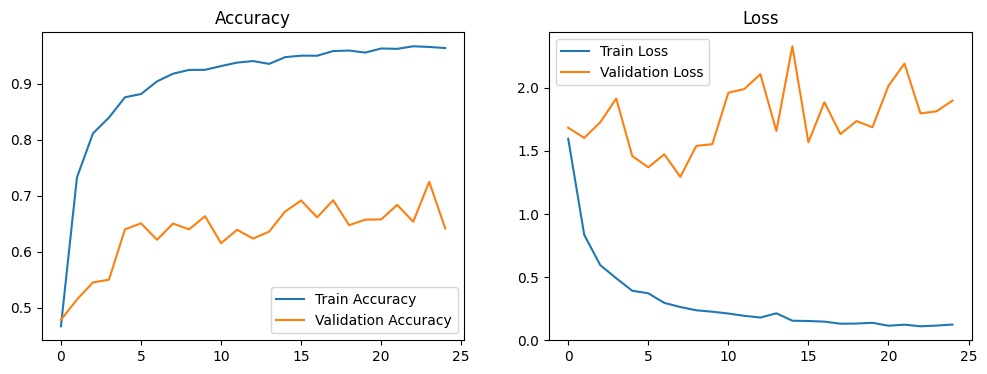

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


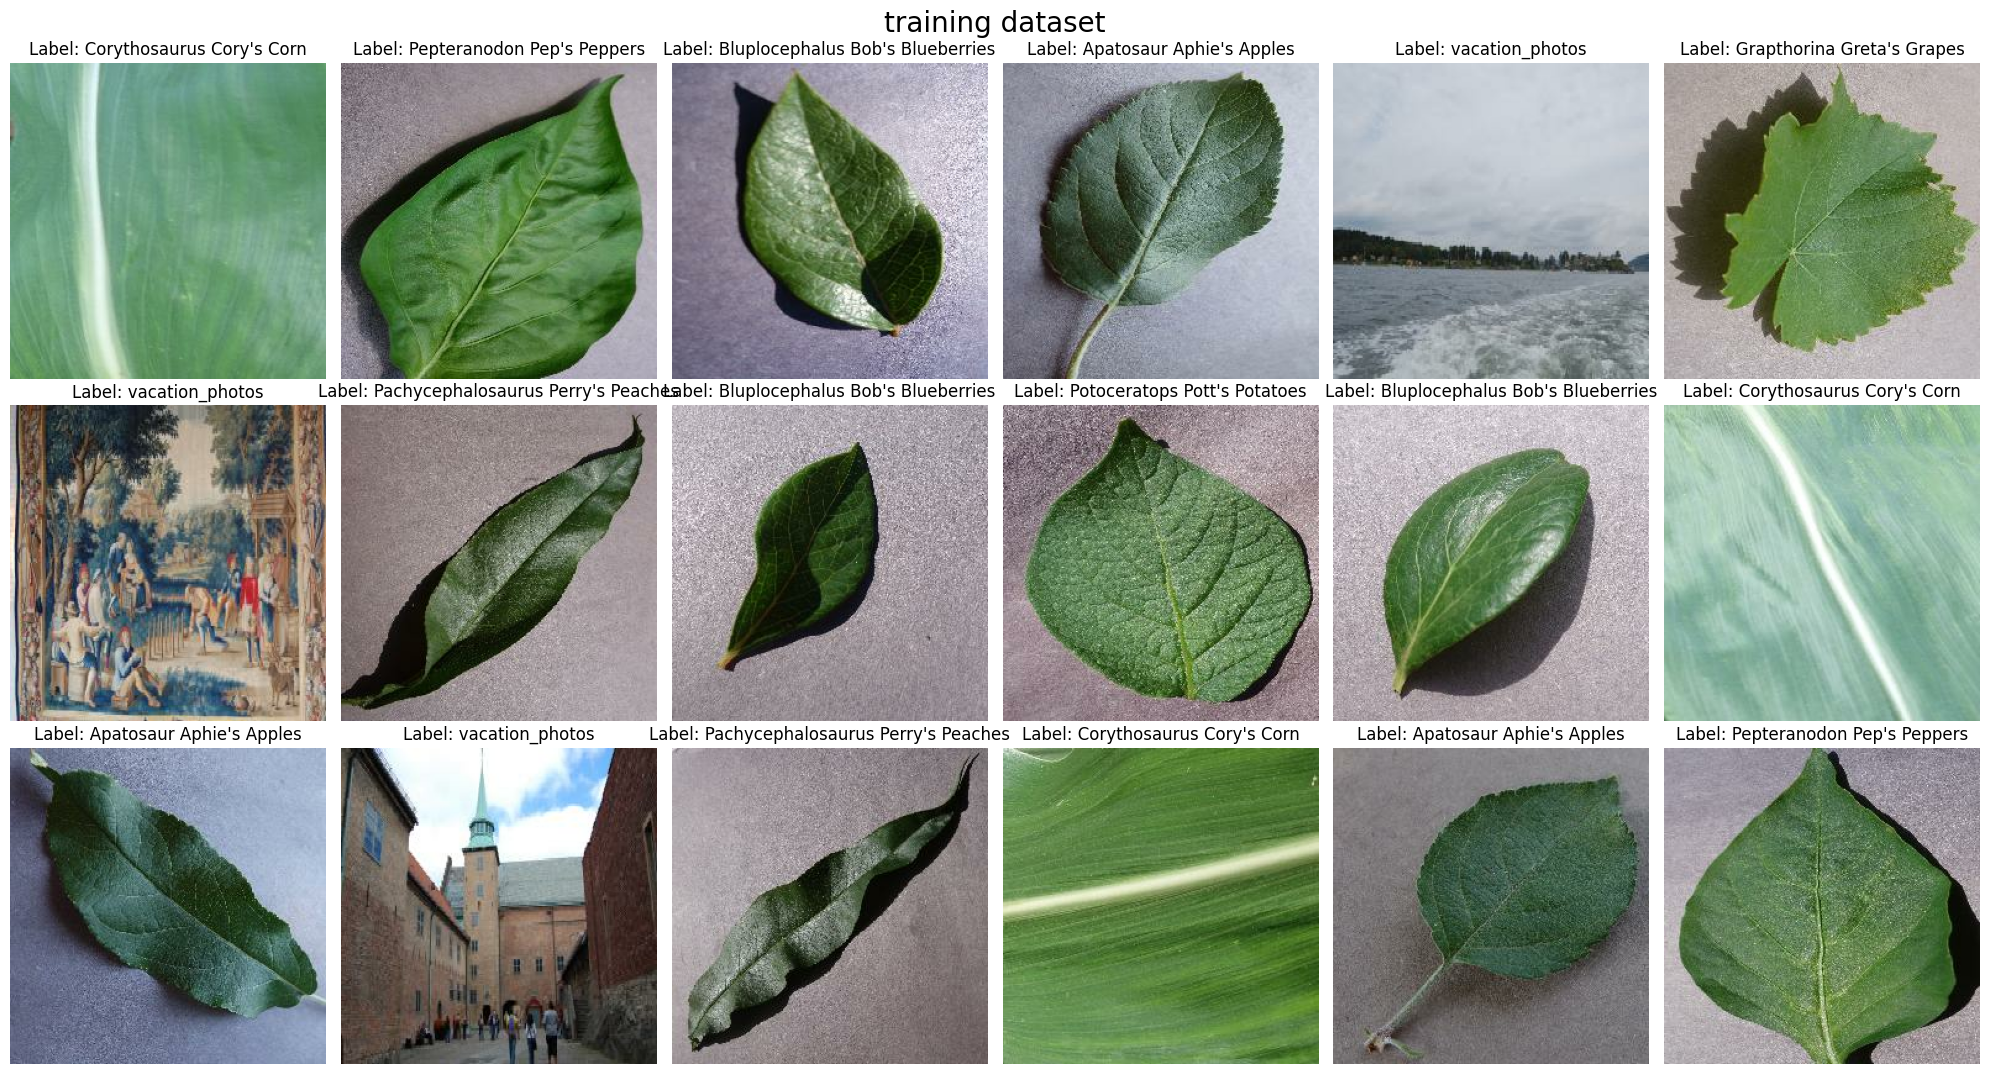

In [96]:
fig, axs = plt.subplots(3, 6, figsize=(20, 11))
fig.suptitle('training dataset', fontsize=20)

image_batch, label_batch = next(iter(train_dataset))

for ax, img, label in zip(axs.flatten(), image_batch, label_batch):
    ax.imshow(img)
    ax.set_title(f"Label: {class_names[np.argmax(label)]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━

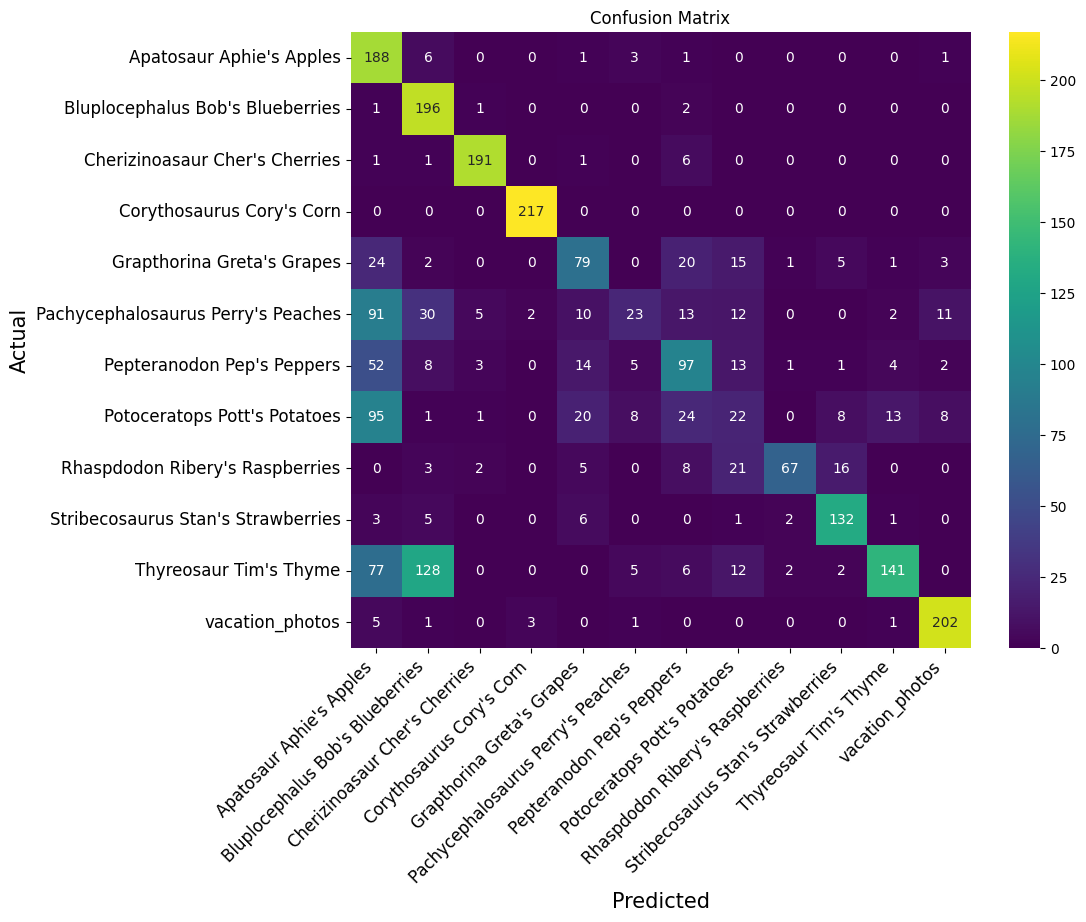

In [97]:
y_true = []
y_pred = []

for images, labels in test_dataset:
    y_true.extend(np.argmax(labels, axis=1))
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix')
plt.show()

In [98]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.35      0.94      0.51       200
  Bluplocephalus Bob's Blueberries       0.51      0.98      0.67       200
    Cherizinoasaur Cher's Cherries       0.94      0.95      0.95       200
         Corythosaurus Cory's Corn       0.98      1.00      0.99       217
        Grapthorina Greta's Grapes       0.58      0.53      0.55       150
Pachycephalosaurus Perry's Peaches       0.51      0.12      0.19       199
        Pepteranodon Pep's Peppers       0.55      0.48      0.51       200
      Potoceratops Pott's Potatoes       0.23      0.11      0.15       200
   Rhaspdodon Ribery's Raspberries       0.92      0.55      0.69       122
Stribecosaurus Stan's Strawberries       0.80      0.88      0.84       150
            Thyreosaur Tim's Thyme       0.87      0.38      0.53       373
                   vacation_photos       0.89      0.95      0.9